# __Visualizing Spatial Data with R__

## __Install Packages for Geospatial Analysis__

In [ ]:
gen_pkgs = c("dplyr","tidyverse","ggplot2","stringr","gapminder")
gis_pkgs = c("spData","gstat","sf","spatstat","stars","units","tidygeocoder","countrycode")
# map_pkgs = c("maps","mapview","rnaturalearth","gmap","tmap","leaflet")
# rendr3d_pkgs = c("rayrender", "elevatr", "rayshader")

install.packages(gen_pkgs)
install.packages(gis_pkgs)
# install.packages(map_pkgs)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘textshaping’, ‘ragg’


Warning message in install.packages(gen_pkgs):
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in install.packages(gen_pkgs):
“installation of package ‘ragg’ had non-zero exit status”
Warning message in install.packages(gen_pkgs):
“installation of package ‘tidyverse’ had non-zero exit status”
Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(spData)
library(tidyverse)
library(units)
library(tidygeocoder)
library(ggplot2)
library(gstat)
library(sf)
library(spatstat)
library(stars)
library(stringr)
library(gapminder)
library(countrycode)

To access larger datasets in this package, install the spDataLarge
package with: `install.packages('spDataLarge',
repos='https://nowosad.github.io/drat/', type='source')`

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.2.0     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

udunits database from /usr/share/xml/udunits/udunits2.xml

Linking to GEOS 3.9.1, GDAL 3.3.2, PROJ 7.2.1; sf_use_s2() is TRUE

Loading required package: spatstat.data

Loading required package: spatstat.geom

spatstat.geom 3.1-0

Loading required package: spatstat.random

spatstat.random 3.1-4

Loading required package: spatstat.explore



## **Load Dataset**

In [ ]:
data <- world
glimpse(data)

Rows: 177
Columns: 11
$ iso_a2    <chr> "FJ", "TZ", "EH", "CA", "US", "KZ", "UZ", "PG", "ID", "AR", …
$ name_long <chr> "Fiji", "Tanzania", "Western Sahara", "Canada", "United Stat…
$ continent <chr> "Oceania", "Africa", "Africa", "North America", "North Ameri…
$ region_un <chr> "Oceania", "Africa", "Africa", "Americas", "Americas", "Asia…
$ subregion <chr> "Melanesia", "Eastern Africa", "Northern Africa", "Northern …
$ type      <chr> "Sovereign country", "Sovereign country", "Indeterminate", "…
$ area_km2  <dbl> 19289.97, 932745.79, 96270.60, 10036042.98, 9510743.74, 2729…
$ pop       <dbl> 885806, 52234869, NA, 35535348, 318622525, 17288285, 3075770…
$ lifeExp   <dbl> 69.96000, 64.16300, NA, 81.95305, 78.84146, 71.62000, 71.039…
$ gdpPercap <dbl> 8222.2538, 2402.0994, NA, 43079.1425, 51921.9846, 23587.3375…
$ geom      <MULTIPOLYGON [°]> MULTIPOLYGON (((-180 -16.55..., MULTIPOLYGON ((…


In [ ]:
t(data %>% map(~sum(is.na(.))))

iso_a2,name_long,continent,region_un,subregion,type,area_km2,pop,lifeExp,gdpPercap,geom
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2,0,0,0,0,0,0,10,10,17,0


In [ ]:
st_crs(data)  # check the CRS of gis data

Coordinate Reference System:
  User input: EPSG:4326 
  wkt:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    USAGE[
        SCOPE["Horizontal component of 3D system."],
        AREA["World."],
        BBOX[-90,-180,90,180]],
    ID["EPSG",4326]]

In [ ]:
data1 <- data %>%
  drop_na()  %>%  # drop na's
  st_transform(crs="EPSG:900913")  # convert coordinate ref system 
                                      

In [ ]:
# check the CRS of gis data
# basic info on CRS: https://www.esri.com/arcgis-blog/products/arcgis-pro/mapping/coordinate-systems-difference/
st_crs(data1)  

Coordinate Reference System:
  User input: EPSG:900913 
  wkt:
PROJCRS["Google Maps Global Mercator",
    BASEGEOGCRS["WGS 84",
        DATUM["World Geodetic System 1984",
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["Popular Visualisation Pseudo-Mercator",
        METHOD["Popular Visualisation Pseudo Mercator",
            ID["EPSG",1024]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["False easting",0,
            LENGTHUNIT["metre",1],
            ID["EPSG",8806]],
        PARAMETER["False northing",0,
            LENGTHUNIT["metre",1],
            ID["EPSG",8807]]],
    CS[Cart

Warning message:
“plotting the first 9 out of 10 attributes; use max.plot = 10 to plot all”


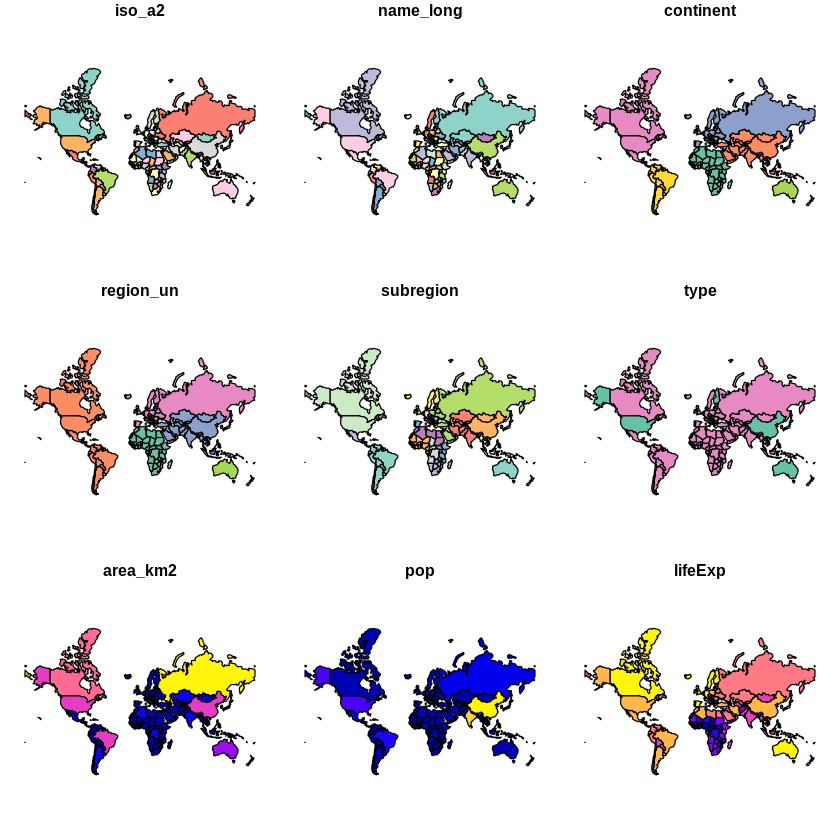

In [ ]:
# crude plot of spatial data attributes
plot(data1)

# __Plot world map with different projections__

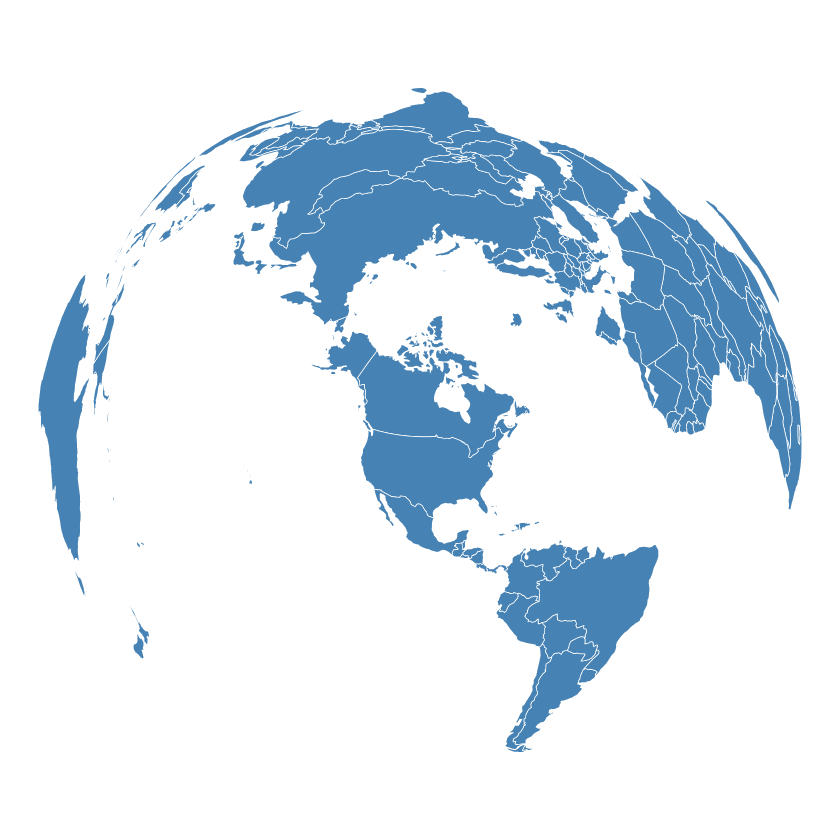

In [ ]:
ggplot() +
  geom_sf(data=data1,
          fill="steel blue",
          color="white",
          size=0.25)  +
  coord_sf(crs = "EPSG:2163")  +  # changing CRS projection within ggplot; some other options: EPSG:3395, ESRI:54030, EPSG:2163, etc
  theme_void()                       # more info about projection and crs: https://proj.org/about.html, https://spatialreference.org/ 

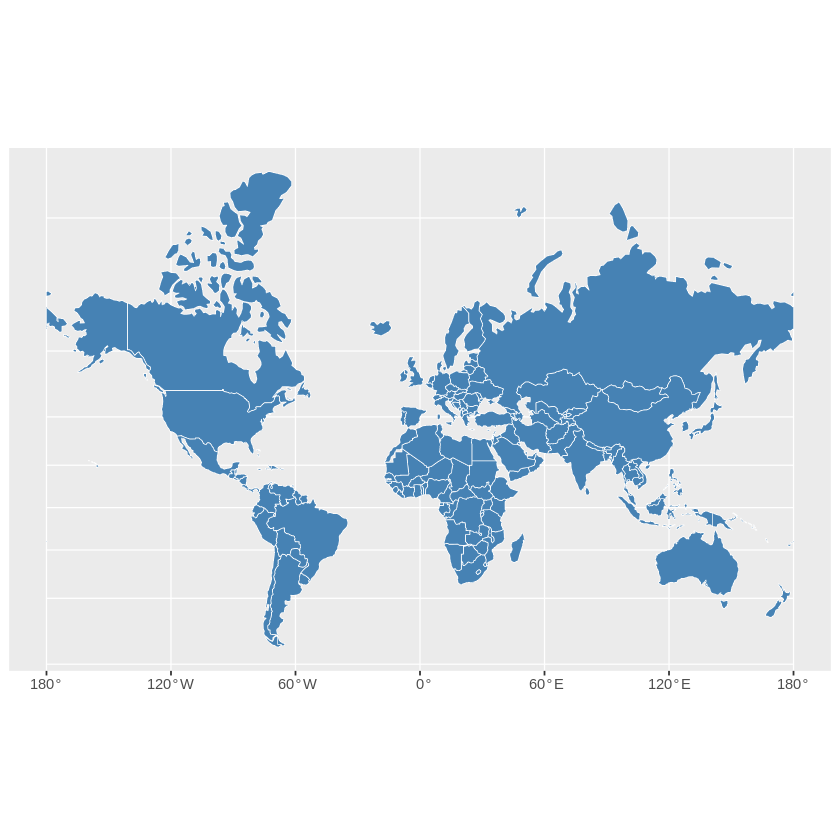

In [ ]:
ggplot() +
  geom_sf(data=data1,
          fill="steel blue",
          color="white",
          size=0.25)  +
  coord_sf(crs = "EPSG:900913")  + 
  theme_grey()

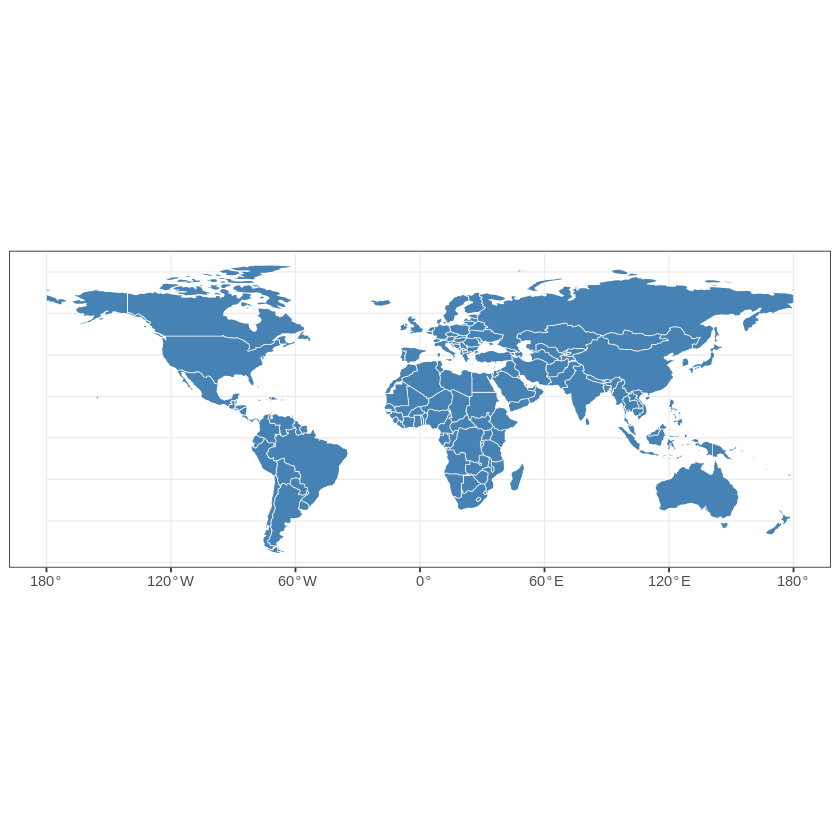

In [ ]:
ggplot() +
  geom_sf(data=data1,
          fill="steel blue",
          color="white",
          size=0.25)  +
  coord_sf(crs = "EPSG:4087")  + 
  theme_bw()

## __Layering GIS data__

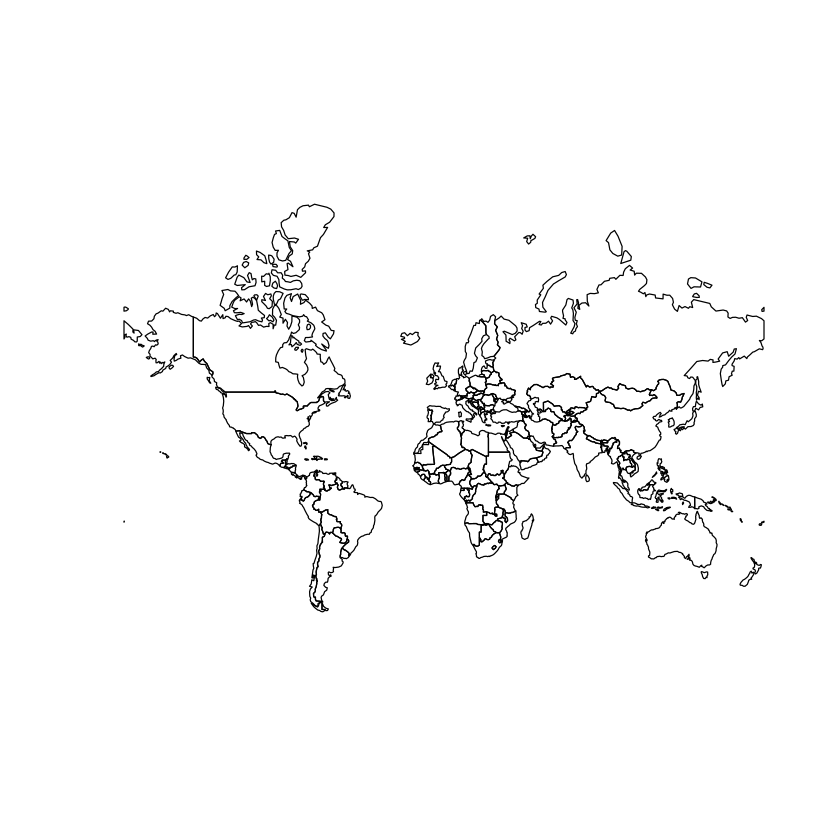

In [ ]:
plot(data1$geom)

In [ ]:
ROI <- c("FJ", "TZ", "EH", "CA", "US", "KZ", "UZ", "PG", "ID", "AR")
data2 <- data %>%
  filter(iso_a2 %in% ROI)

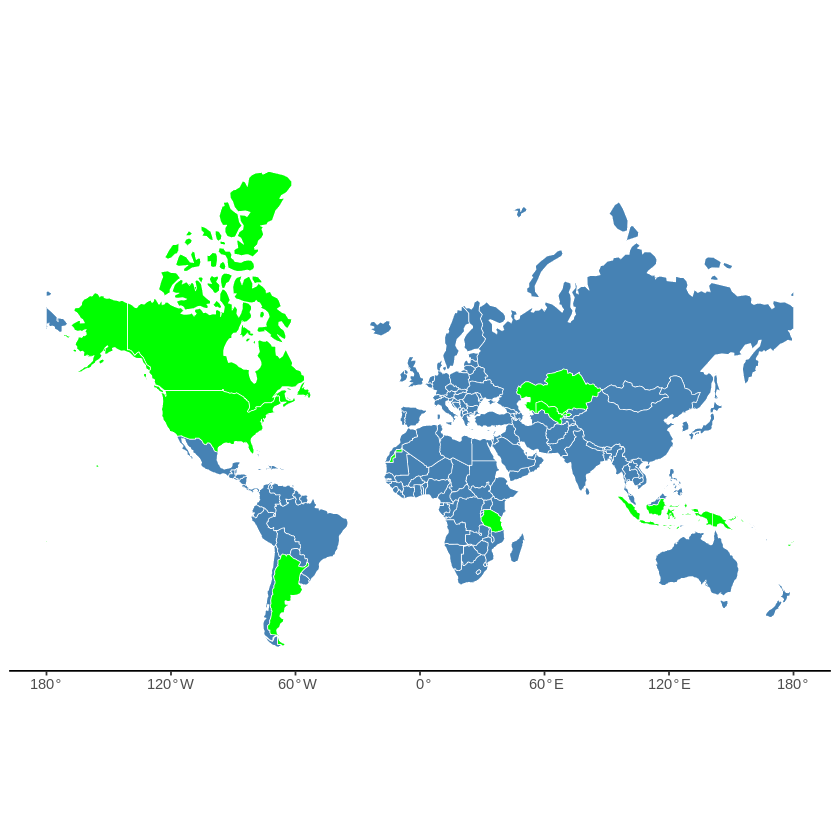

In [ ]:
ggplot() +
  geom_sf(data=data1, fill="steel blue", color="white", size=0.25)  +
  geom_sf(data=data2, fill="green", color="white", size=0.25)  +
  theme_classic()

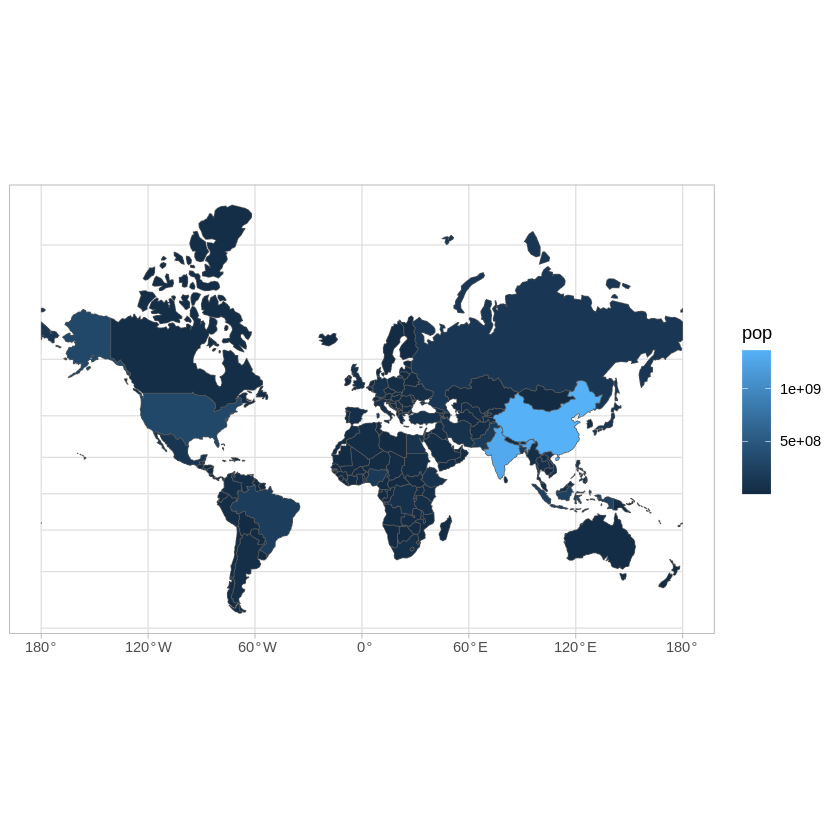

In [ ]:
# plot spatial attribute
ggplot() +
  geom_sf(data=data1, fill="steel blue", color="white", size=0.25)  +
  geom_sf(data=data1, aes(fill=pop))  +
  theme_light()

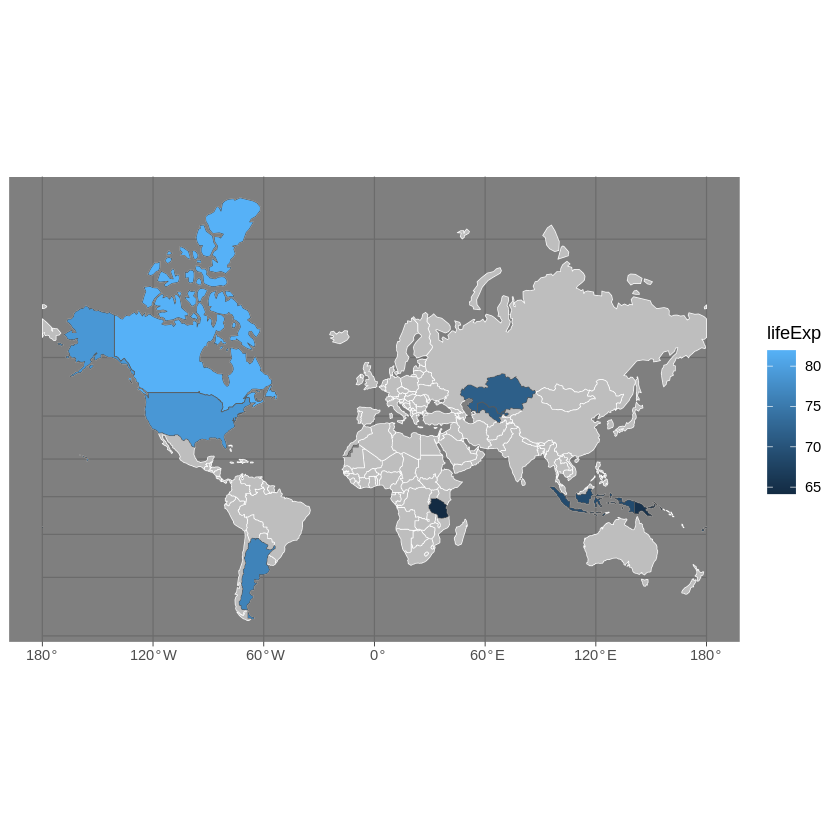

In [ ]:
ggplot() +
  geom_sf(data=data1, fill="grey", color="white", size=0.25)  +  
  geom_sf(data=data2, aes(fill=lifeExp))  +
  theme_dark()

In [ ]:
data1tr <- data1 %>%
  st_transform(crs = st_crs("EPSG:900913"))

glimpse(data1tr)

Rows: 160
Columns: 11
$ iso_a2    <chr> "FJ", "TZ", "CA", "US", "KZ", "UZ", "PG", "ID", "AR", "CL", …
$ name_long <chr> "Fiji", "Tanzania", "Canada", "United States", "Kazakhstan",…
$ continent <chr> "Oceania", "Africa", "North America", "North America", "Asia…
$ region_un <chr> "Oceania", "Africa", "Americas", "Americas", "Asia", "Asia",…
$ subregion <chr> "Melanesia", "Eastern Africa", "Northern America", "Northern…
$ type      <chr> "Sovereign country", "Sovereign country", "Sovereign country…
$ area_km2  <dbl> 19289.97, 932745.79, 10036042.98, 9510743.74, 2729810.51, 46…
$ pop       <dbl> 885806, 52234869, 35535348, 318622525, 17288285, 30757700, 7…
$ lifeExp   <dbl> 69.96000, 64.16300, 81.95305, 78.84146, 71.62000, 71.03900, …
$ gdpPercap <dbl> 8222.2538, 2402.0994, 43079.1425, 51921.9846, 23587.3375, 53…
$ geom      <MULTIPOLYGON [m]> MULTIPOLYGON (((-20037508 -..., MULTIPOLYGON ((…


In [ ]:
data3 <- gapminder %>%
  mutate(iso_2a = countrycode(source=gapminder$country, origin="country.name", destination="iso2c"))

glimpse(data3)

Rows: 1,704
Columns: 7
$ country   <fct> "Afghanistan", "Afghanistan", "Afghanistan", "Afghanistan", …
$ continent <fct> Asia, Asia, Asia, Asia, Asia, Asia, Asia, Asia, Asia, Asia, …
$ year      <int> 1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, …
$ lifeExp   <dbl> 28.801, 30.332, 31.997, 34.020, 36.088, 38.438, 39.854, 40.8…
$ pop       <int> 8425333, 9240934, 10267083, 11537966, 13079460, 14880372, 12…
$ gdpPercap <dbl> 779.4453, 820.8530, 853.1007, 836.1971, 739.9811, 786.1134, …
$ iso_2a    <chr> "AF", "AF", "AF", "AF", "AF", "AF", "AF", "AF", "AF", "AF", …


In [ ]:
data4 <- data1tr %>%
  select(iso_a2,geom) %>%
  full_join(data3, by=c("iso_a2" = "iso_2a"))
glimpse(data4)

Rows: 1,738
Columns: 8
$ iso_a2    <chr> "FJ", "TZ", "TZ", "TZ", "TZ", "TZ", "TZ", "TZ", "TZ", "TZ", …
$ geom      <MULTIPOLYGON [m]> MULTIPOLYGON (((-20037508 -..., MULTIPOLYGON ((…
$ country   <fct> NA, "Tanzania", "Tanzania", "Tanzania", "Tanzania", "Tanzani…
$ continent <fct> NA, Africa, Africa, Africa, Africa, Africa, Africa, Africa, …
$ year      <int> NA, 1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 19…
$ lifeExp   <dbl> NA, 41.215, 42.974, 44.246, 45.757, 47.620, 49.919, 50.608, …
$ pop       <int> NA, 8322925, 9452826, 10863958, 12607312, 14706593, 17129565…
$ gdpPercap <dbl> NA, 716.6501, 698.5356, 722.0038, 848.2187, 915.9851, 962.49…


In [ ]:
t(data4 %>% map(~sum(is.na(.))))

iso_a2,geom,country,continent,year,lifeExp,pop,gdpPercap
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,34,34,34,34,34,34


In [ ]:
data4[!complete.cases(data4$country),]

ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(geo

iso_a2,geom,country,continent,year,lifeExp,pop,gdpPercap
<chr>,<MULTIPOLYGON [m]>,<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
FJ,MULTIPOLYGON (((-20037508 -...,NA,NA,NA,NA,NA,NA
KZ,MULTIPOLYGON (((9724867 631...,NA,NA,NA,NA,NA,NA
UZ,MULTIPOLYGON (((6230351 505...,NA,NA,NA,NA,NA,NA
PG,MULTIPOLYGON (((15696072 -2...,NA,NA,NA,NA,NA,NA
RU,MULTIPOLYGON (((-20037508 9...,NA,NA,NA,NA,NA,NA
BS,MULTIPOLYGON (((-8792013 30...,NA,NA,NA,NA,NA,NA
TL,MULTIPOLYGON (((13911450 -9...,NA,NA,NA,NA,NA,NA
BZ,MULTIPOLYGON (((-9923362 20...,NA,NA,NA,NA,NA,NA
GY,MULTIPOLYGON (((-6293936 21...,NA,NA,NA,NA,NA,NA


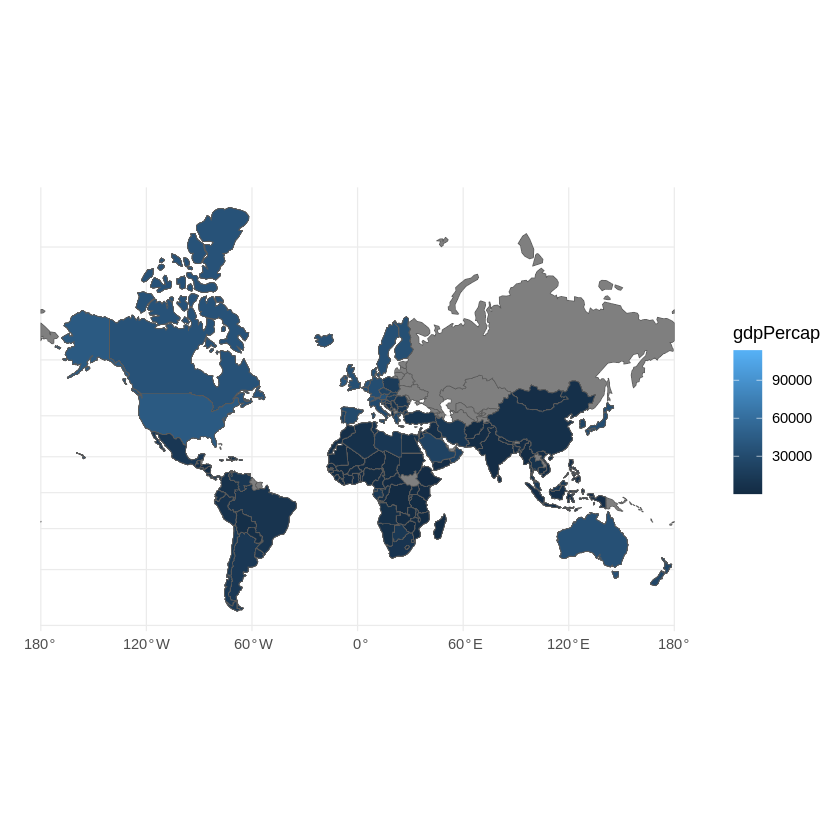

In [ ]:
ggplot() +
  geom_sf(data=data4, fill="steel blue", color="white", size=0.25)  +
  geom_sf(data=data4, aes(fill=gdpPercap)) +
  theme_minimal()

# References:
1. https://www.youtube.com/watch?v=nQVFqkifeSE&list=PPSV; https://www.youtube.com/watch?v=2H1RUCMIVU0

2. https://cengel.github.io/R-spatial/; https://rkabacoff.github.io/datavis/GeoMaps.html

3. https://www.youtube.com/watch?v=GjTmvivY1yw&t=3178s; https://r-spatial.org/book/

4. https://cran.r-project.org/web/packages/spData/spData.pdf

5. https://journal.r-project.org/archive/2011-1/RJournal_2011-1_South.pdf